<a href="https://colab.research.google.com/github/alejandroaviles/WL_MACSS-2023/blob/main/Solution-Proyect1_estimator_for__the_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time
import os

In [1]:
!git clone https://github.com/alejandroaviles/WL_MACSS-2023.git

Cloning into 'WL_MACSS-2023'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 139 (delta 5), reused 0 (delta 0), pack-reused 126
Receiving objects: 100% (139/139), 13.33 MiB | 16.71 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [3]:
os.chdir('WL_MACSS-2023')  # move to repositiry folder

Since the apparent size of resolved background objects change, their flux changes as well. These two effects are manifestation of *gravitational magnification*, and can be used as weak-lensing observables in addition to the deformation (shear) of galaxy shapes. This magnification is an estimator of the convergence $\kappa$.

The convergence $\kappa$ can be interpreted as a (projected) surface density.

The assumption that the density field $\delta$ on large scales is statistically homogeneous and isotropic (which follows from the cosmological principle), the same holds for the convergence.

In [9]:
dt=np.dtype({'names':['X','Y','kappa'],'formats':[float,float,float]})

In [10]:
data= np.loadtxt(open('convergence.txt'),dtype=dt)
X_data=[x[0] for x in data]
Y_data=[x[1] for x in data]
kappa_data=[x[2] for x in data]

The basic second-order function of the convergence is the two-point correlation function (2PCF) $⟨\kappa(\vec{ϑ})\kappa(\vec{ϑ}+\vec{θ})⟩$. The brackets denote ensemble average, which can be replaced by a spatial average over angular positions $\vec{ϑ}$.

The 2PCF is then invariant under traslation and rotation, and therefore a function a function of only the modulus of the separation vector between the two lines of sight $\theta$.

In [6]:
def xi_kappa_kappa (samplexT, sampleyT, sampleKappaT, numOfbins, maxdist):

    Num  = len(samplexT)
    hist_xikk = np.zeros(numOfbins)
    numInbin = np.zeros(numOfbins)

    bindist = maxdist/(numOfbins)

    for i in range(Num):
        p1x = samplexT[i]
        p1y = sampleyT[i]
        kappa1 = sampleKappaT[i]

        for j in range(i+1,Num):
            p2x = samplexT[j]
            p2y = sampleyT[j]
            kappa2 = sampleKappaT[j]

            dist = np.sqrt(((p2y - p1y)**2) + ((p2x - p1x)**2))

            xi_kk = kappa1 * kappa2

            # binning
            if(0<dist<=maxdist):
                inbin = int(dist/bindist)
                numInbin[[inbin]]  += 1
                hist_xikk[[inbin]] += xi_kk

    numInbin[numInbin==0]=1

    hist_xikk = np.divide(hist_xikk,numInbin)

    return hist_xikk, numInbin

In [7]:
inicio = time.time()
xikk, numInbin = xi_kappa_kappa(X_data,Y_data,kappa_data,10 , 2.828)
fin = time.time()
print(fin-inicio)

0.2607424259185791


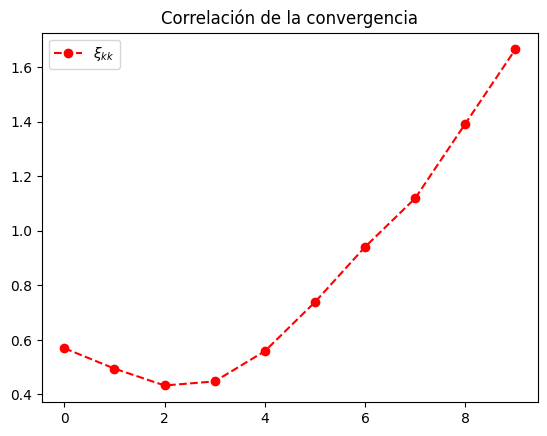

In [8]:
plt.plot(xikk, 'r--o', label="$\\xi_{kk}$")
plt.title("Correlación de la convergencia")
plt.legend()
plt.show()

All information presented here was taken from https://arxiv.org/pdf/1411.0115.pdf